In [2]:
import time

# Definir la función recursiva forma_recursiva
def forma_recursiva(n):
    if n == 0:
        return 0
    elif n == 1:
        return 5
    else:
        return 3 * forma_recursiva(n-1) + 4 * forma_recursiva(n-2)

# Definir el rango de valores de n
n_values = range(0, 40)

# Almacenar los tiempos de ejecución para forma recursiva
times_forma_recursiva = []

# Medir tiempos de ejecución para forma_recursiva
for n in n_values:
    start_time = time.perf_counter()
    for _ in range(40):  # Ejecutar 40 veces para obtener un promedio
        forma_recursiva(n)
    end_time = time.perf_counter()
    times_forma_recursiva.append(((end_time - start_time) / 40) * 1_000_000)  # Convertir a microsegundos


In [5]:
# Definir la función matemática forma_matematica
def forma_matematica(n):
    #if n % 2 == 0:
    #    return (4**n) - 1
    #else:
    #    return (4**n) + 1
    return (4**n) - (-1)**n

# Almacenar los tiempos de ejecución para forma matemática
times_forma_matematica = []

# Medir tiempos de ejecución para forma_matematica
for n in n_values:
    start_time = time.perf_counter()
    for _ in range(40):  # Ejecutar 40 veces para obtener un promedio
        forma_matematica(n)
    end_time = time.perf_counter()
    times_forma_matematica.append(((end_time - start_time) / 40) * 1_000_000)  # Convertir a microsegundos


In [6]:
import csv

# Guardar los tiempos en un solo archivo CSV
with open('times2.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['n', 'forma_recursiva_time_us', 'forma_matematica_time_us'])
    for n, time_recursiva, time_matematica in zip(n_values, times_forma_recursiva, times_forma_matematica):
        writer.writerow([n, time_recursiva, time_matematica])


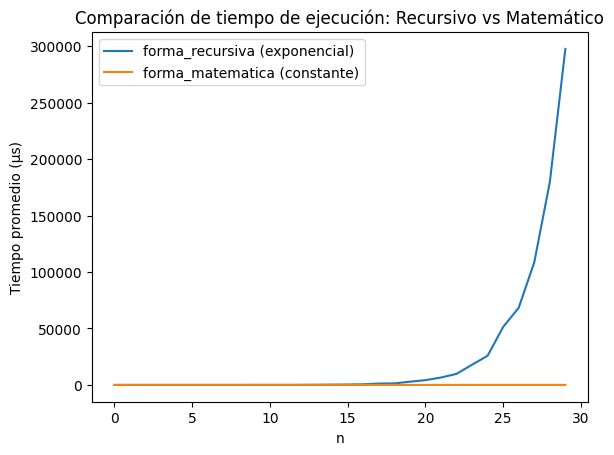

In [39]:
import csv
import matplotlib.pyplot as plt

# Leer datos del archivo CSV
n_values = []
times_forma_recursiva = []
times_forma_matematica = []

with open('times.csv', mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        n_values.append(int(row['n']))
        times_forma_recursiva.append(float(row['forma_recursiva_time_us']))
        times_forma_matematica.append(float(row['forma_matematica_time_us']))

# Graficar los resultados
plt.plot(n_values, times_forma_recursiva, label="forma_recursiva (exponencial)")
plt.plot(n_values, times_forma_matematica, label="forma_matematica (constante)")
plt.xlabel("n")
plt.ylabel("Tiempo promedio (μs)")  # Microsegundos
plt.legend()
plt.title("Comparación de tiempo de ejecución: Recursivo vs Matemático")
plt.show()
